Data Set – column_2C_weka

In class Assignment Expectations/Steps -

-	Apply Data Cleaning to the Datasets and then apply k-means, Agglomerative clustering to find pattern and the best value for the following features.
-	Build a classification model on k-means, agglomerative clustering


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('column_2C_weka.csv')

In [3]:
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
df['class'].replace({'Abnormal':1,'Normal':0},inplace=True)

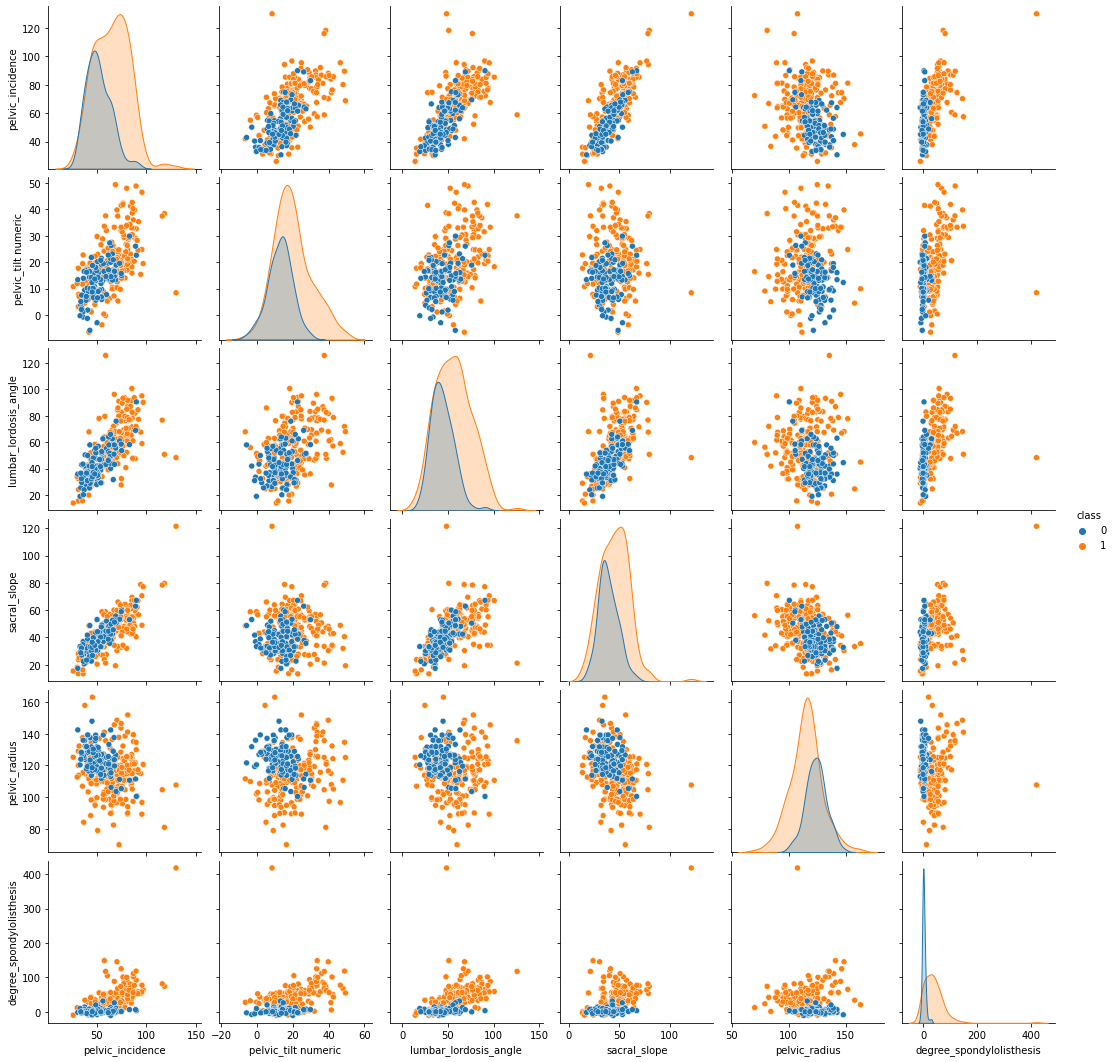

In [5]:
sns.pairplot(df,diag_kind='kde',hue='class')

In [6]:
xp = df.drop(columns=['class'])
y = df['class']

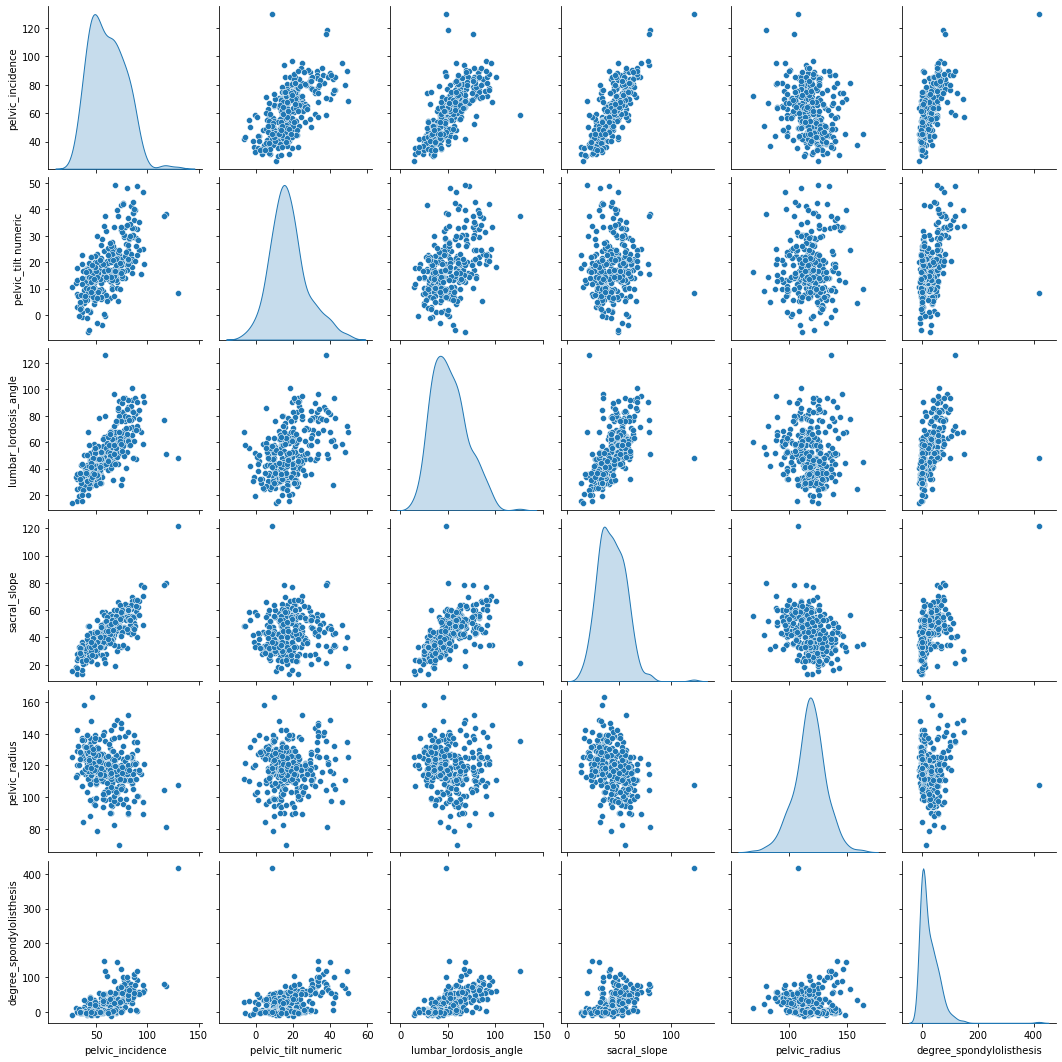

In [7]:
sns.pairplot(xp,diag_kind='kde')

In [8]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

x_kmean = pt.fit_transform(xp)
x_kmean = pd.DataFrame(x_kmean,columns=xp.columns)

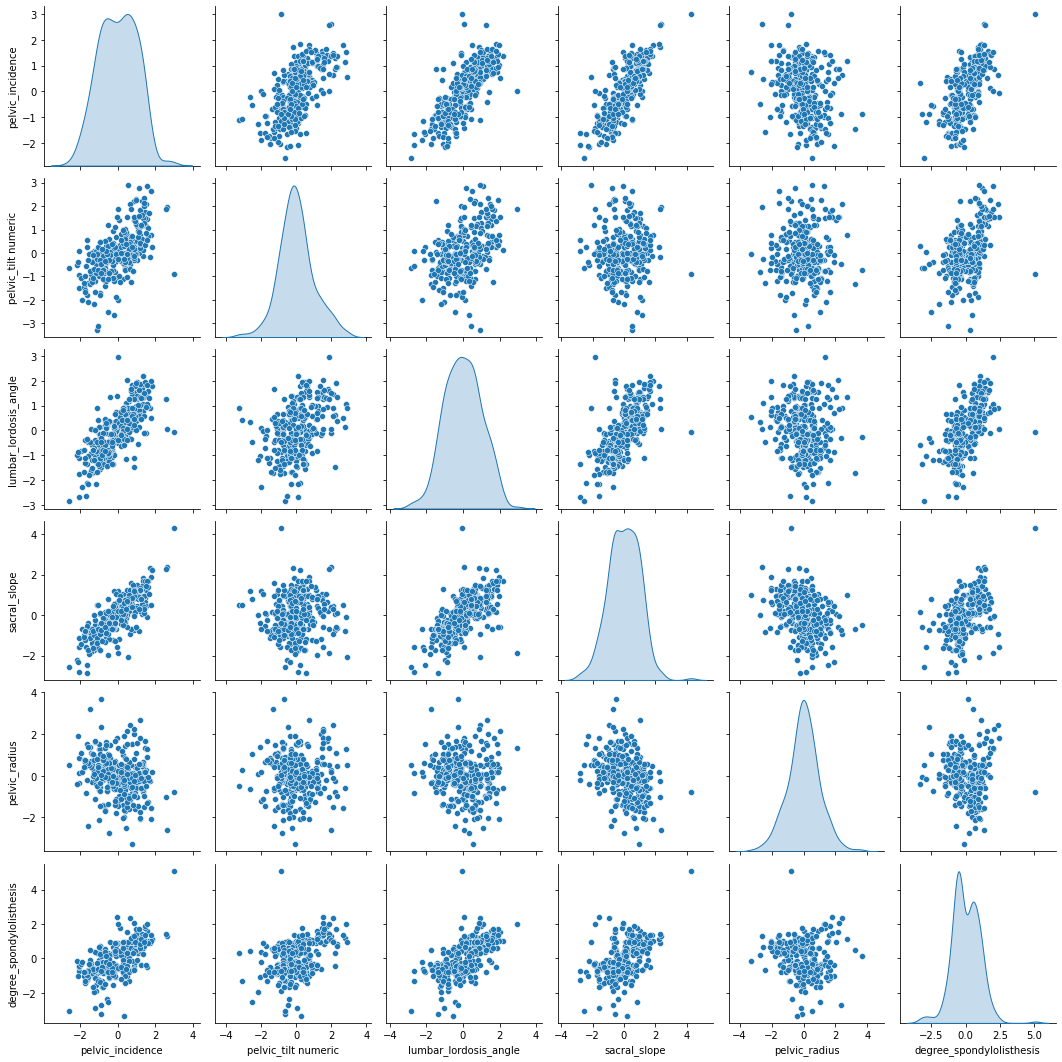

In [11]:
sns.pairplot(x_kmean,diag_kind='kde')

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

cluster_range = np.arange(1,16)
cluster_error = []

for i in cluster_range:
    k = KMeans(n_clusters=i,n_init=14)
    k.fit(x_kmean)
    cluster_error.append(k.inertia_)
    
k_means = [KMeans(n_clusters=i,random_state=4).fit(x_kmean) for i in range(1,16)]
s_score = [silhouette_score(x_kmean,h.labels_) for h in k_means[1:]]

In [13]:
pd.DataFrame({'No of Clusters':cluster_range,'Cluster Errors':cluster_error})

,No of Clusters,Cluster Errors
0,1,1860.000000
1,2,1122.471168
2,3,923.813670
3,4,819.148276
4,5,739.368749
5,6,681.276226
6,7,635.580025
7,8,602.712573
8,9,571.955260
9,10,539.695237


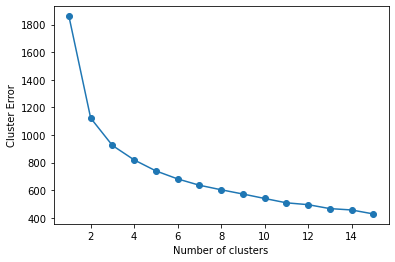

In [14]:
plt.plot(cluster_range,cluster_error,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Cluster Error')
plt.show()

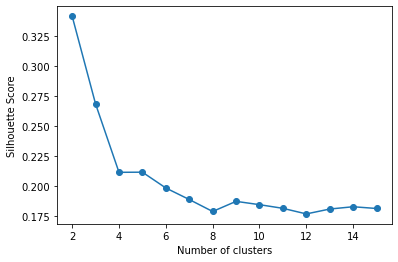

In [15]:
plt.plot(np.arange(2,16),s_score,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

The highest silhouette score is for 2 clusters and the elbow plot supports it. Hence we can go with two clusters.

In [16]:
kmean = KMeans(n_clusters=2,random_state=2)
kmean.fit(x_kmean)
labels = kmean.predict(x_kmean)

In [19]:
x_kmean['Group'] = labels

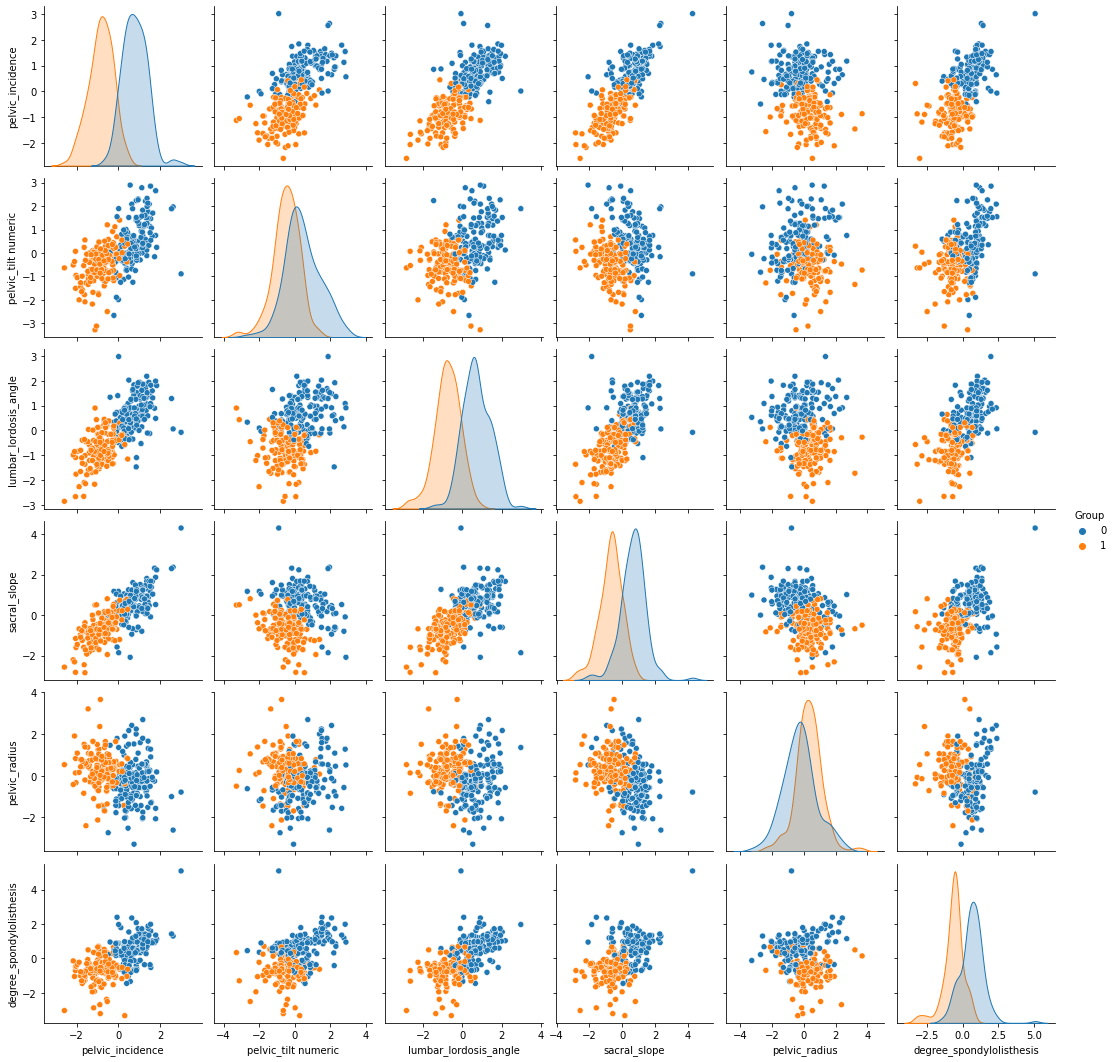

In [20]:
sns.pairplot(x_kmean,diag_kind='kde',hue='Group')

# Aglomerative clustering

In [21]:
df = pd.read_csv('column_2C_weka.csv')

In [22]:
xp = df.drop(columns=['class'])
y = df['class']

In [23]:
pt = PowerTransformer()

x_ag = pt.fit_transform(xp)
x_ag = pd.DataFrame(x_ag,columns=xp.columns)

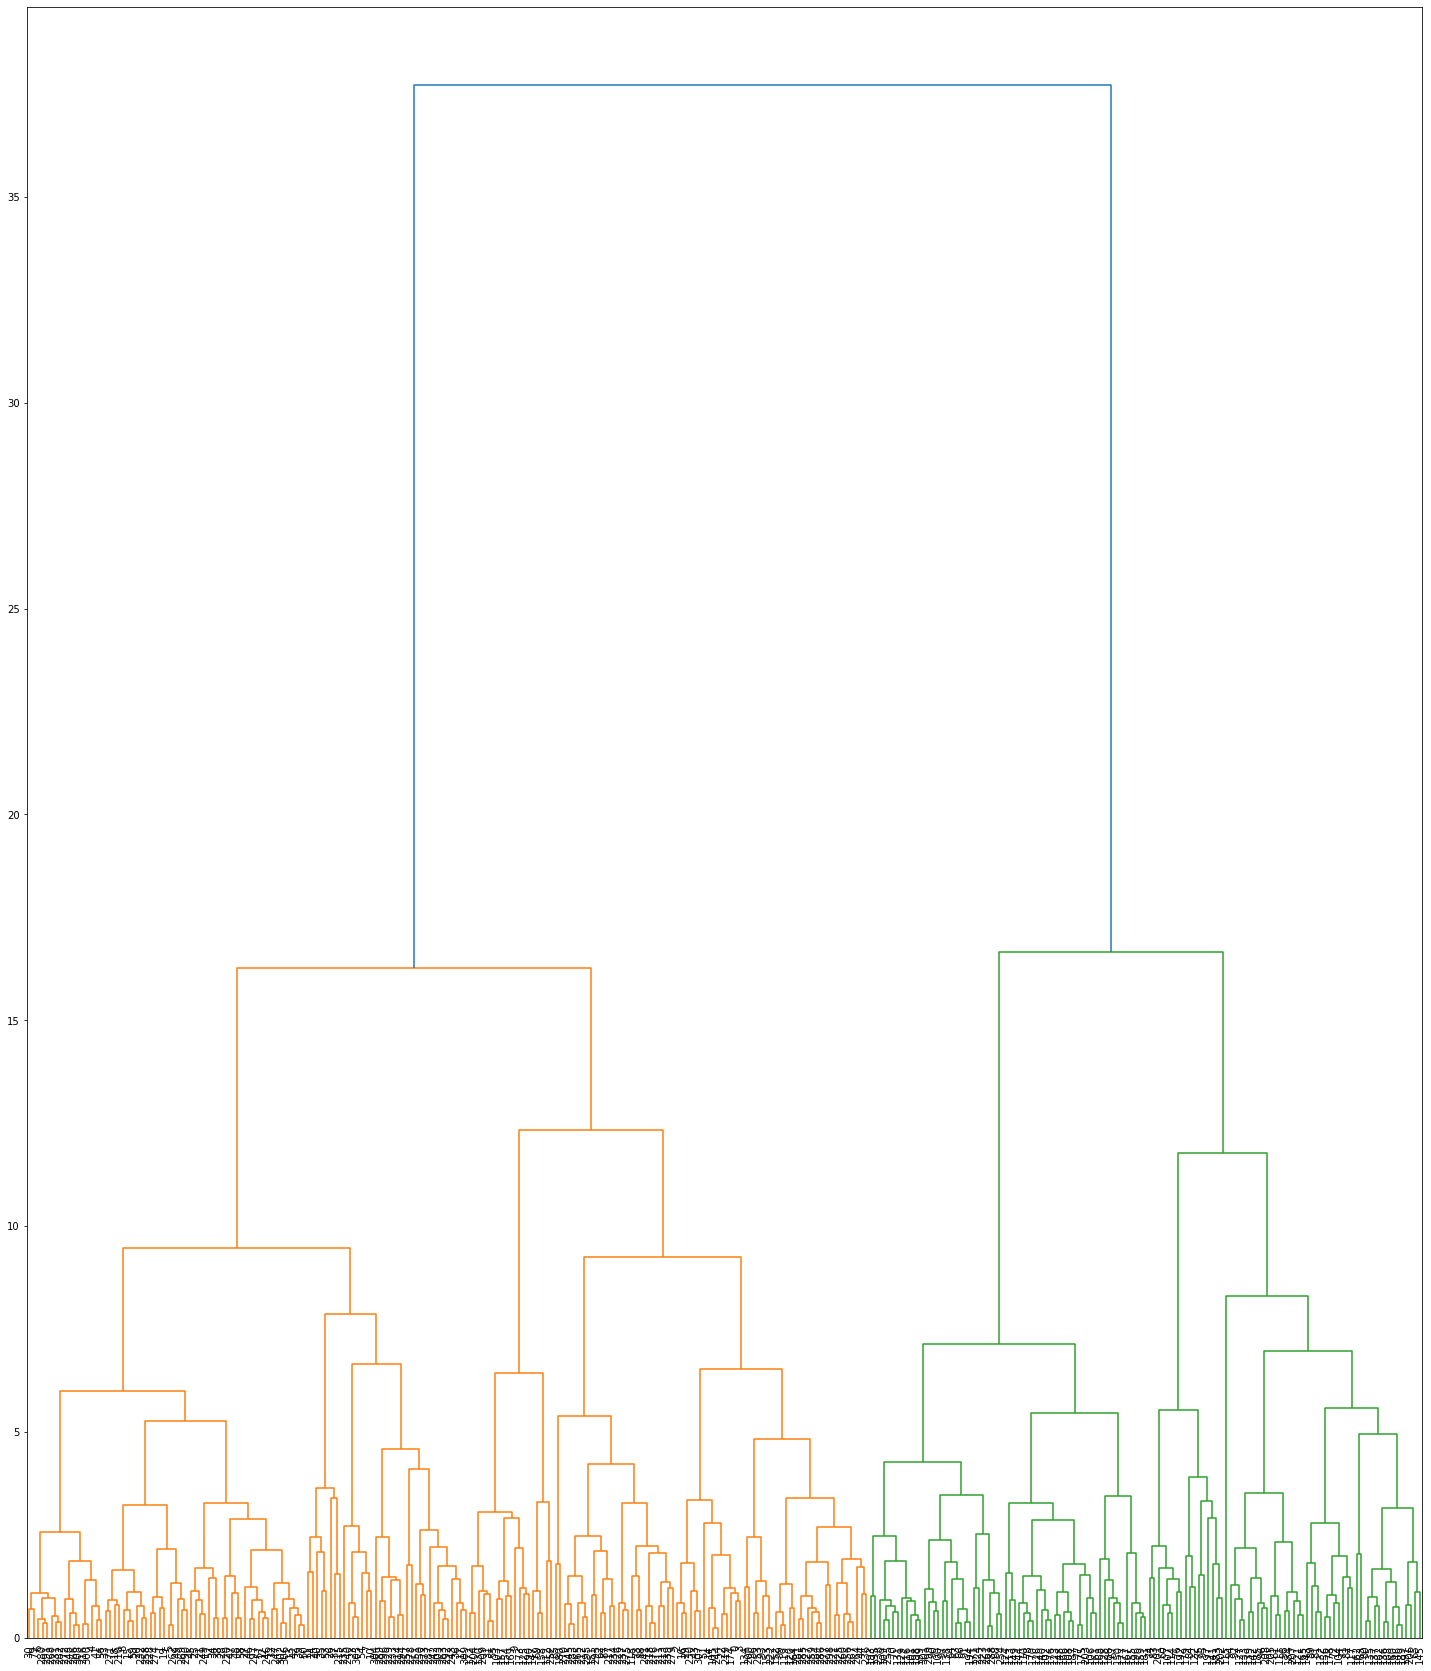

In [24]:
from scipy.cluster.hierarchy import dendrogram,linkage
plt.figure(figsize=(25,30))
z = linkage(x_ag,'ward')
dendrogram(z,p=30,leaf_rotation=90,color_threshold=25,leaf_font_size=10,truncate_mode='level')
plt.show()

In [25]:
from sklearn.cluster import AgglomerativeClustering

agc = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')

In [26]:
agc.fit(x_ag)

AgglomerativeClustering()

In [27]:
x_ag['class'] = agc.labels_

In [28]:
x_ag.groupby(["class"]).count()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
class,,,,,,
0,123,123,123,123,123,123
1,187,187,187,187,187,187


In [32]:
x_kmean.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,Group
0,0.257617,0.534531,-0.603254,-0.099794,-1.426465,-0.789163,1
1,-1.356466,-0.714095,-1.694145,-1.071028,-0.289648,-0.443516,1
2,0.572348,0.502944,0.020947,0.355733,-0.907444,-1.339499,0
3,0.596634,0.731407,-0.310979,0.213504,-1.201685,-0.155518,0
4,-0.562700,-0.758142,-1.416026,-0.131921,-0.749270,-0.286411,1


In [49]:
org = pd.get_dummies(df,columns=['class'],drop_first=True)
x_org = org.drop(columns=['class_Normal'])
y_org = org['class_Normal']

xkmean = x_kmean.drop(columns='Group')
ykmean = x_kmean['Group']

xag = x_ag.drop(columns=['class'])
yag = x_ag['class']

In [50]:
org.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class_Normal
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lr = LogisticRegression()

cv_org = cross_val_score(lr,x_org,y_org,cv=5, scoring='roc_auc')
cv_kmean = cross_val_score(lr,xkmean,ykmean,cv= 5,scoring='roc_auc')
cv_ag = cross_val_score(lr,xag,yag,cv= 5,scoring='roc_auc')

In [52]:
print('The avg ROC AUC score Logistic regression  with,')
print('Model with original data    =',np.mean(cv_org))
print('Model with kmean class      =',np.mean(cv_kmean))
print('Model with Agglomerate class=',np.mean(cv_ag))

The avg ROC AUC score Logistic regression  with,
Model with original data    = 0.9097619047619048
Model with kmean class      = 1.0
Model with Agglomerate class= 0.9986934566145091


We can see that the logistic regression gave a much higher ROC AUC score for Agglomerate and Kmean clusterd data.